In [63]:
# Using pretrained model to sped up the training process and get better results
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer

In [42]:
model = SentenceTransformer("all-MiniLM-L6-v2")
journal_archives = pd.read_csv("archive/data.csv")['Answer']

In [43]:
# Splitting 80% data for training, 20% to get the threshold
train_data = journal_archives[:int(len(journal_archives) * 0.8)]
test_data = journal_archives[int(len(journal_archives) * 0.8):]

In [44]:
journal_encode = model.encode(train_data, show_progress_bar=True)

Batches:   0%|          | 0/37 [00:00<?, ?it/s]

In [65]:
similarity_max = []
for t in test_data:
    test_encode = model.encode(t)
    similarities = model.similarity(journal_encode, test_encode)
    sim_np = similarities.numpy()
    similarity_max.append(sim_np.max())

In [52]:
similarity_max = pd.Series(similarity_max)
min(similarity_max)

0.20711462199687958

array([[<Axes: title={'center': '0'}>]], dtype=object)

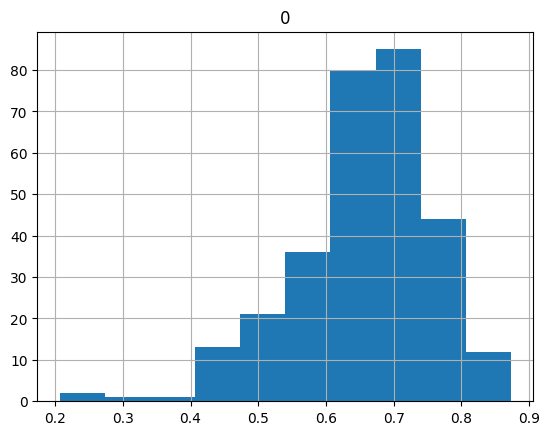

In [54]:
sim_df = pd.DataFrame(similarity_max)
sim_df.hist()
# Take 40% as the threshold from histogram

In [56]:
# Testing the threshold

query_true = "Today was a productive day. I started the morning with a healthy breakfast and then went for a jog in the park. After that, I spent a few hours working on my project, which is coming along nicely. In the afternoon, I took a break to read a book and then helped my neighbor with some gardening. It felt good to be outside and enjoy the sunshine. In the evening, I cooked dinner and spent time with my family. Overall, it was a fulfilling and satisfying day. I am grateful for the positive experiences and looking forward to continuing my progress tomorrow."
query_encoded = model.encode(query_true)
similarity_query = model.similarity(journal_encode, query_encoded)
max_similarity = float(max(similarity_query))
print(max_similarity)
if(max_similarity > 0.4):
    print("The journal entry is valid")
else:
    print("The journal entry is invalid")

0.7657811641693115
The journal entry is valid


In [57]:
query_false = "JAKARTA, - Indonesian President-elect Prabowo Subianto will allow the nation's debt-to-GDP ratio to rise to 50%, provided his administration can boost tax revenue, the Financial Times reported citing one of his closest advisers. Prabowo's brother and adviser Hashim Djojohadikusumo told the Financial Times in a London interview that Indonesia could retain its investment-grade credit rating even if the debt-to-gross domestic product ratio rises to 50%."
query_encoded = model.encode(query_false)
similarity_query = model.similarity(journal_encode, query_encoded)
max_similarity = float(max(similarity_query))
print(max_similarity)
if(max_similarity > 0.4):
    print("The journal entry is valid")
else:
    print("The journal entry is invalid")

0.1865680068731308
The journal entry is invalid


In [58]:
query_false = "asdlkasd ,asd0qwlklas dl;kasdpoq ,amsdnasd"
query_encoded = model.encode(query_false)
similarity_query = model.similarity(journal_encode, query_encoded)
max_similarity = float(max(similarity_query))
print(max_similarity)
if(max_similarity > 0.4):
    print("The journal entry is valid")
else:
    print("The journal entry is invalid")

0.18917787075042725
The journal entry is invalid


In [69]:
# Check the words to have at least 20 non-stop words
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

def check_journal_length(journal):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(journal)
    non_stop_words = [w for w in word_tokens if not w in stop_words]
    return len(non_stop_words) > 20

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
query_too_short = "I am eating salad today with my family"

In [73]:
print(check_journal_length(query_true))
print(check_journal_length(query_too_short))

True
False
